In [1]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("HR_comma_sep.csv")

In [4]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [90]:
X = df [['satisfaction_level', 'left', 'number_project', 'average_montly_hours', 'time_spend_company']]

In [91]:
X

,satisfaction_level,left,number_project,average_montly_hours,time_spend_company
0,0.38,1,2,157,3
1,0.80,1,5,262,6
2,0.11,1,7,272,4
3,0.72,1,5,223,5
4,0.37,1,2,159,3
...,...,...,...,...,...
14994,0.40,1,2,151,3
14995,0.37,1,2,160,3
14996,0.37,1,2,143,3
14997,0.11,1,6,280,4


In [98]:
c = df.salary

In [93]:
c.unique()

array(['low', 'medium', 'high'], dtype=object)

In [99]:
cs = pd.get_dummies(c, prefix = None)

In [100]:
cs

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


# Low#

In [101]:
model_low = linear_model.LogisticRegression().\
    fit(X, cs.low)

print model_left.coef_
print model_left.intercept_

[[  3.09336588e-02   6.92938580e-01   1.65382147e-02  -3.07145772e-04
   -8.76256978e-02]]
[ 0.07270141]


In [102]:
model_low.score(X, cs.low)

0.56377091806120405

In [72]:
logit_hat_low = model_low.intercept_ + \
    (X * model_low.coef_[0]).sum(axis = 1)

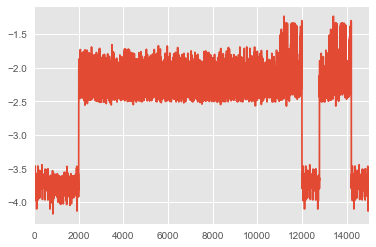

In [67]:
logit_hat_high.plot()

In [46]:
((logit_hat_low >= 0) == (cs.low == 1)).sum()

7683

In [47]:
((logit_hat_low >= 0) == (cs.low == 1)).mean()

0.51223414894326291

In [48]:
odds_hat_low = np.exp(logit_hat_low)

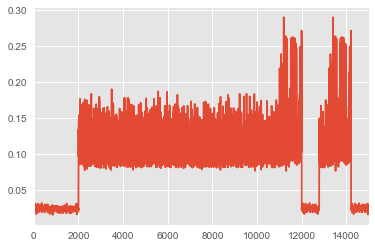

In [50]:
odds_hat_low.plot()

In [51]:
((odds_hat_low >= 1) == (cs.low == 1)).sum()

7683

In [52]:
((odds_hat_low >= 1) == (cs.low == 1)).mean()

0.51223414894326291

In [53]:
p_hat_low = odds_hat_low / (1 + odds_hat_low)

In [54]:
p_hat_low

0        0.024157
1        0.025530
2        0.021980
3        0.023306
4        0.024224
           ...   
14994    0.024018
14995    0.024227
14996    0.024187
14997    0.023283
14998    0.024222
dtype: float64

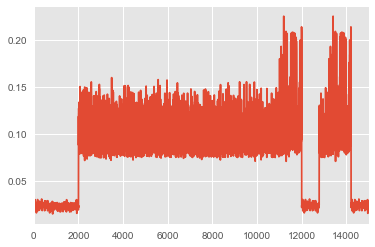

In [56]:
p_hat_low.plot()

In [128]:
pd.crosstab(c_hat_low,
    cs.low,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,0,1
Hypothesized Class,,
0.0,7683,7316


# Medium#

In [103]:
model_medium = linear_model.LogisticRegression().\
    fit(X, cs.medium)

print model_left.coef_
print model_left.intercept_

[[  3.09336588e-02   6.92938580e-01   1.65382147e-02  -3.07145772e-04
   -8.76256978e-02]]
[ 0.07270141]


In [104]:
model_medium.score(X, cs.medium)

0.56850456697113139

In [105]:
logit_hat_medium = model_medium.intercept_ + \
    (X * model_medium.coef_[0]).sum(axis = 1)

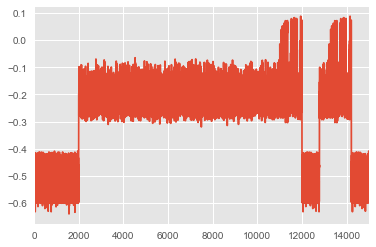

In [106]:
logit_hat_medium.plot()

In [107]:
((logit_hat_medium >= 0) == (cs.medium == 1)).mean()

0.56850456697113139

In [108]:
((logit_hat_medium >= 0) == (cs.medium == 1)).sum()

8527

In [109]:
((logit_hat_medium >= 0) != (cs.medium == 1)).sum()

6472

In [112]:
odds_hat_medium = np.exp(logit_hat_medium)

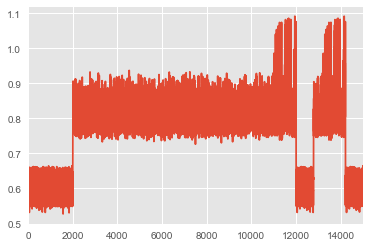

In [113]:
odds_hat_medium.plot()

In [121]:
p_hat_medium = odds_hat_medium / (1 + odds_hat_medium)

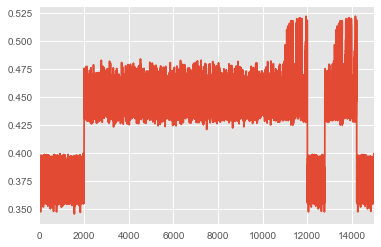

In [122]:
p_hat_medium.plot()

In [123]:
c_hat_medium = p_hat_medium.round()

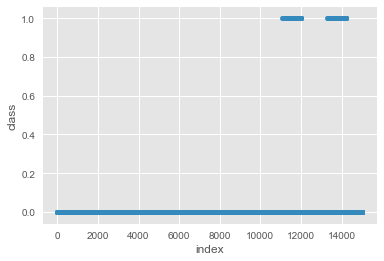

In [124]:
pd.DataFrame({'class': c_hat_medium, 'index': c_hat_medium.index}).\
    plot(kind = 'scatter', x = 'index', y = 'class')

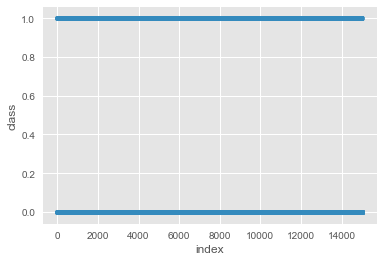

In [125]:
pd.DataFrame({'class': cs.medium, 'index': cs.medium.index}).\
    plot(kind = 'scatter', x = 'index', y = 'class')

In [127]:
pd.crosstab(c_hat_medium,
    cs.medium,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,0,1
Hypothesized Class,,
0.0,8431,6350
1.0,122,96


# High#

In [129]:
model_high = linear_model.LogisticRegression().\
    fit(X, cs.high)

print model_left.coef_
print model_left.intercept_

[[  3.09336588e-02   6.92938580e-01   1.65382147e-02  -3.07145772e-04
   -8.76256978e-02]]
[ 0.07270141]


In [130]:
model_high.score(X, cs.high)

0.9175278351890126

In [132]:
logit_hat_high = model_high.intercept_ + \
    (X * model_high.coef_[0]).sum(axis = 1)

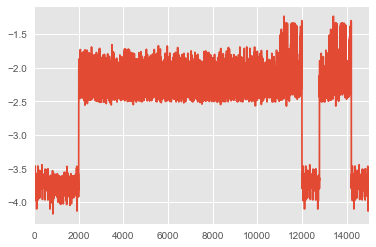

In [133]:
logit_hat_high.plot()

In [134]:
((logit_hat_high >= 0) == (cs.high == 1)).mean()

0.9175278351890126

In [135]:
((logit_hat_high >= 0) == (cs.high == 1)).sum()

13762

In [136]:
odds_hat_high = np.exp(logit_hat_high)

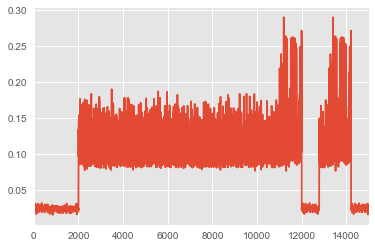

In [137]:
odds_hat_high.plot()

In [138]:
p_hat_high = odds_hat_high / (1 + odds_hat_high)

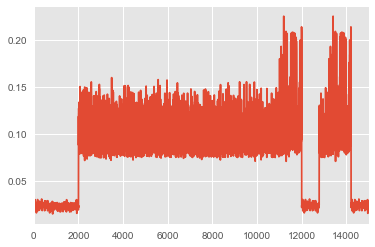

In [140]:
p_hat_high.plot()

In [141]:
c_hat_high = p_hat_high.round()

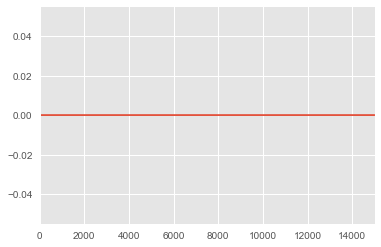

In [142]:
c_hat_high.plot()

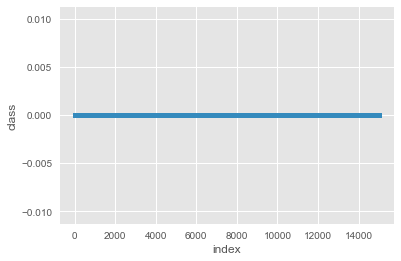

In [143]:
pd.DataFrame({'class': c_hat_high, 'index': c_hat_high.index}).\
    plot(kind = 'scatter', x = 'index', y = 'class')

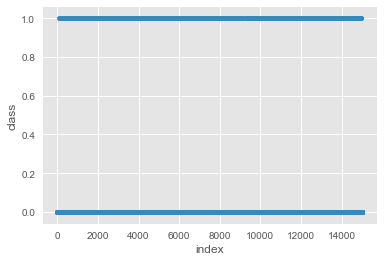

In [144]:
pd.DataFrame({'class': cs.high, 'index': cs.high.index}).\
    plot(kind = 'scatter', x = 'index', y = 'class')

In [145]:
(c_hat_high == cs.high).sum()

13762

In [146]:
(c_hat_high != cs.high).sum()

1237

In [147]:
pd.crosstab(c_hat_high,
    cs.high,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,0,1
Hypothesized Class,,
0.0,13762,1237


In [148]:
hats = pd.DataFrame({'Low': c_hat_low,
    'Medium': c_hat_medium,
    'High': c_hat_high})

In [149]:
hats.sum()

High        0.0
Low         0.0
Medium    218.0
dtype: float64

In [151]:
hats.sum(axis = 1).value_counts()

0.0    14781
1.0      218
dtype: int64

In [158]:
pd.crosstab([hats.Low, hats.High], hats.Medium)

,Medium,0.0,1.0
Low,High,,
0.0,0.0,14781,218


In [173]:
hats = pd.DataFrame({'p_Low': p_hat_low,
    'p_medium': p_hat_medium,
    'p_high': p_hat_high})

hats['p'] = hats.max(axis = 1)

hats['c'] = 'High'
hats.loc[hats.p_medium == hats.p, 'c'] = 'Medium'
hats.loc[hats.p_high == hats.p, 'c'] = 'High'

In [174]:
hats

,p_Low,p_high,p_medium,p,c
0,0.024157,0.024157,0.355966,0.355966,Medium
1,0.025530,0.025530,0.397197,0.397197,Medium
2,0.021980,0.021980,0.371814,0.371814,Medium
3,0.023306,0.023306,0.384807,0.384807,Medium
4,0.024224,0.024224,0.355936,0.355936,Medium
...,...,...,...,...,...
14994,0.024018,0.024018,0.355922,0.355922,Medium
14995,0.024227,0.024227,0.355988,0.355988,Medium
14996,0.024187,0.024187,0.355100,0.355100,Medium
14997,0.023283,0.023283,0.371321,0.371321,Medium


In [175]:
(hats.c == c).mean()

0.0

In [170]:
(hats.c == c).sum()

0

In [171]:
(hats.c != c).mean()

1.0

In [172]:
pd.crosstab(
    hats.c,
    c,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,high,low,medium
Hypothesized Class,,,
Medium,1237,7316,6446


In [177]:
X = df[ ['satisfaction_level', 'left', 'number_project', 'average_montly_hours', 'time_spend_company'] ]
c = df.salary

model = linear_model.LogisticRegression().\
    fit(X, c)

In [178]:
model.score(X, c)

0.49849989999333288

In [179]:
c_hat = model.predict(X)

pd.crosstab(c_hat,
    c,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,high,low,medium
Hypothesized Class,,,
low,849,5860,4829
medium,388,1456,1617
